In [1]:
import numpy as np
import simpy
import copy
import matplotlib.pyplot as plt

### Machines and Products

In [2]:
#Assign different seeds to this model here
np.random.seed(5)

In [6]:
#randomly generate the total number of machines
N_match=np.random.randint(10,20)
#randomly generate the total number of machines
print("There are ",N_match,"types of machines")

There are  16 types of machines


In [7]:
M=[1, 2, 2, 3, 2, 3, 1, 2, 1, 2, 3, 2, 3, 2, 1, 3, 3, 1]
#for i in range(0,N_match):
    #M.append(np.random.randint(2,5))
print("The number of machines for each type of machine is")
print(M)

The number of machines for each type of machine is
[1, 2, 2, 3, 2, 3, 1, 2, 1, 2, 3, 2, 3, 2, 1, 3, 3, 1]


In [8]:
N_machine=0
for i in range(0,N_match):
    N_machine=N_machine+M[i]
print("The total machine number is",N_machine)

The total machine number is 33


In [9]:
env = simpy.Environment()
env1 = simpy.Environment()

In [10]:
#set each type of machines as Resources, capacity of Resources = number of machines in this type
res=[]
for i in range(0,N_match):
    res.append(simpy.Resource(env, capacity=M[i]))

In [11]:
res

In [16]:
N_type=np.random.randint(12,20)
#randomly generate the total number of types of products
print("There are",N_type,"types of products")

There are 13 types of products


In [17]:
#Label machines's types from 0 to N_match
m = []
for i in range(0,N_match):
    m.append(i)

In [18]:
m

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [19]:
#Randomly generate the amount of steps that each type of product needs
steps = []
for i in range(N_type):
    steps.append(np.random.randint(5,10))
    #Each type of product needs 5-9 machines(steps) to generate.
print("The number of machines that each type of product needs is")
print(steps)

The number of machines that each type of product needs is
[5, 9, 8, 5, 5, 9, 6, 5, 8, 9, 8, 6, 9]


In [20]:
total_step=0
for i in range (len(steps)):
    total_step=total_step+steps[i]
print ("the average length of production sequence is",total_step/len(steps))

the average length of production sequence is 7.076923076923077


In [21]:
#Two dimentional list
p_step = [[0 for i in range(max(steps))]for j in range(N_type)]

for i in range(N_type):
    step = steps[i]
    m_copy = copy.copy(m)

    for j in range(step):
        length = len(m_copy)
        randomnum = np.random.randint(0,length)       
        p_step[i][j] = m_copy[randomnum]
        m_copy.pop(randomnum)
        
    p_step[i] = p_step[i][0:step]
print("Production Procedure Sequence: (The machines that each type of products need to go through is")    
print(p_step)
# p_step indicates the production procedure that each type of products goes through.
# for example，if p_step[0]=[9,17,10,14,16], it means that Product No.0 need to go through
# Machine No.9, Machine No.17, Machine No.10, Machine No.14, Machine No.16, before it's been finished.

Production Procedure Sequence: (The machines that each type of products need to go through is
[[6, 14, 2, 11, 12], [10, 9, 11, 1, 3, 12, 0, 8, 5], [0, 1, 6, 7, 13, 5, 4, 10], [6, 10, 3, 4, 2], [1, 6, 9, 5, 15], [11, 3, 14, 1, 9, 5, 2, 10, 15], [0, 15, 11, 10, 7, 1], [5, 2, 15, 13, 10], [13, 6, 12, 9, 0, 7, 3, 1], [7, 8, 6, 14, 0, 1, 13, 10, 12], [11, 5, 10, 7, 4, 8, 2, 15], [8, 1, 14, 7, 4, 6], [1, 9, 0, 4, 15, 5, 8, 3, 13]]


### Input Sequences

In [22]:
S_p=[] #input sequences
N_s=np.random.randint(1,11) # N_s is the total number of input sequences
print("The total number of input sequences is",N_s)

The total number of input sequences is 4


In [23]:
for i in range(N_s):
    S_p.append(np.random.randint(50,300))
    #Each sequence has 50-300 products
print("The number of products in each sequence is",S_p)

The number of products in each sequence is [166, 285, 142, 261]


In [24]:
S=[] #S is the input production sequences
for i in range(0,N_s):
    S.append([np.random.randint(0,N_type)])
    for j in range(0,S_p[i]):
        S[i].append(np.random.randint(0,N_type))
    print("The input production sequences for Sequence[{}] are:".format(i))
    print("S[{}]=".format(i), S[i])

The input production sequences for Sequence[0] are:
S[0]= [1, 4, 2, 3, 4, 9, 4, 0, 10, 12, 6, 6, 9, 2, 10, 9, 3, 0, 8, 8, 11, 9, 7, 12, 4, 11, 8, 10, 6, 12, 8, 0, 5, 3, 11, 11, 4, 0, 2, 2, 1, 11, 1, 7, 1, 7, 2, 6, 3, 6, 8, 0, 9, 1, 9, 0, 8, 7, 7, 9, 4, 1, 11, 4, 2, 1, 7, 5, 12, 4, 2, 2, 1, 2, 3, 1, 2, 4, 9, 0, 1, 2, 3, 8, 10, 5, 10, 5, 4, 3, 10, 9, 5, 9, 6, 9, 5, 1, 1, 0, 12, 8, 0, 5, 10, 9, 3, 12, 11, 3, 0, 3, 7, 3, 7, 3, 2, 6, 6, 2, 7, 0, 3, 12, 7, 5, 1, 11, 6, 11, 7, 3, 9, 7, 9, 10, 7, 6, 6, 4, 10, 5, 10, 4, 0, 0, 1, 12, 5, 3, 1, 7, 0, 11, 10, 9, 8, 3, 4, 4, 10, 9, 9, 6, 7, 9, 11]
The input production sequences for Sequence[1] are:
S[1]= [6, 0, 10, 12, 12, 7, 1, 3, 9, 3, 12, 3, 3, 5, 1, 0, 0, 10, 2, 2, 8, 9, 1, 8, 11, 10, 10, 6, 10, 7, 9, 6, 1, 8, 2, 10, 4, 12, 9, 5, 12, 9, 1, 8, 6, 12, 1, 5, 1, 11, 8, 8, 8, 3, 10, 3, 10, 9, 7, 0, 11, 8, 10, 7, 3, 12, 4, 7, 10, 0, 12, 6, 3, 10, 1, 5, 1, 0, 3, 12, 4, 12, 0, 8, 3, 8, 10, 5, 2, 7, 12, 6, 5, 10, 2, 6, 12, 7, 6, 5, 1, 10, 6, 0, 2, 11, 5,

### Time

In [31]:
#Trep represents the time taken to repair a machine
Trep = []
for i in range(0,N_match):
    Trep.append(np.random.randint(50,100))
print("The time of repairment for the n-th machine is")
print(Trep)

The time of repairment for the n-th machine is
[58, 99, 63, 51, 66, 70, 60, 79, 60, 79, 64, 63, 95, 80, 86, 76]


In [32]:
#The processing time
#Tpro_n represents the time that the n-th machine spend on one product.
Tpro = []
for i in range(0,N_match):
    Tpro.append(np.random.randint(10,40))
print("The time that the n-th machine spend on one product is")
print(Tpro)

The time that the n-th machine spend on one product is
[25, 13, 32, 35, 20, 19, 36, 38, 19, 34, 16, 36, 26, 27, 19, 22]


In [33]:
#Tbk_n represents the non-failure running time (aka downtime) of the n-th machine when we randomly generate the breakdown time. 
Tbk = []
for i in range(0,N_match):
    Tbk.append(np.random.randint(200,500))
print("The non-failure running time (aka downtime) of the n-th machine is")
print(Tbk)

The non-failure running time (aka downtime) of the n-th machine is
[464, 476, 432, 378, 204, 322, 358, 424, 222, 429, 243, 396, 439, 286, 353, 397]


In [34]:
#Even for the same type of machines, the downtime between every single machine is different
Tbk1=[]
for i in range(0,N_match):
    Tbk1.append([Tbk[i]-np.random.randint(30,60)])
    for j in range(0,M[i]-1):
        Tbk1[i].append(Tbk[i]+np.random.randint(30,60))

In [35]:
print("The non-failure running time (aka downtime) of each machine is")
print(Tbk1)

The non-failure running time (aka downtime) of each machine is
[[431], [438, 506], [388, 490], [325, 427, 420], [164, 249], [285, 365, 374], [301], [370, 468], [179], [398, 486], [203, 279, 284], [341, 428], [403, 473, 494], [242, 340], [306], [339, 428, 428]]


### observe parameters

In [36]:
global block1
block1=0 #block1 is used to track the total amount of products that have been blocked by other products by a certain time

In [37]:
global block2
block2=0 #block2 is used to track the total amount of products that have been blocked by the broken machines by a certain time

In [38]:
global block3
block3=0 #block3 is used to track how many products are blocked by other products at a certain time

In [39]:
global block4
block4=0 #block4 is used to track how many products are blocked by the broken machines at a certain time

In [40]:
#list M_state[i][j]: M_state[i]=0 means the machine(s) of type No.i is vacant, 
#M_state[i]=1 means the machine(s) of type No.i is occupied, 
#M_state[i]=2 means the machine(s) of type No.i is broken down.
M_state=[]
for i in range(0,N_match):
    M_state.append(0)

In [41]:
M_state

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [42]:
#block_time is used to track block time
global block_time
block_time=0

In [43]:
global M_vacant
M_vacant=N_machine  #the number of machines that are vacant

In [44]:
T_repair_finish=[] #T_repair_finish is used to store the time when repariment finishes for each machine
for i in range(0,N_match):
    T_repair_finish.append(0)

In [45]:
T_repair_finish

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [46]:
global M_occupied
M_occupied=0 #the number of machines that are occupied

In [47]:
global M_broken
M_broken=0 #the number of machines that are broken

In [48]:
global t_block
t_block=0

In [49]:
cost=0#cost is used to track the total cost during the whole operation
obs_time=[]
obs_cost=[]
obs_M_broken=[]#track the total number of machines that are broken at a certain time
obs_P_block=[]#track how many products are blocked(waiting) at a certain time 

In [50]:
# How much percentage of products skips machines
P_skip=[0,0,0,0,0,0,0,0,0]

### laxity factor

In [51]:
wait=[] #wait list for each type of machine
for i in range(0,N_match):
    wait.append([])
wait

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [52]:
global skip
skip=0 #the number of skipping

In [53]:
threshold=10

In [54]:
wait_N=[]
for i in range(0,N_match):
    wait_N.append(0)
wait_N

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [55]:
S_sequence=[]
for i in range(0,len(S[0])):
    S_sequence.append(copy.deepcopy(p_step[S[0][i]]))
S_sequence

[[10, 9, 11, 1, 3, 12, 0, 8, 5],
 [1, 6, 9, 5, 15],
 [0, 1, 6, 7, 13, 5, 4, 10],
 [6, 10, 3, 4, 2],
 [1, 6, 9, 5, 15],
 [7, 8, 6, 14, 0, 1, 13, 10, 12],
 [1, 6, 9, 5, 15],
 [6, 14, 2, 11, 12],
 [11, 5, 10, 7, 4, 8, 2, 15],
 [1, 9, 0, 4, 15, 5, 8, 3, 13],
 [0, 15, 11, 10, 7, 1],
 [0, 15, 11, 10, 7, 1],
 [7, 8, 6, 14, 0, 1, 13, 10, 12],
 [0, 1, 6, 7, 13, 5, 4, 10],
 [11, 5, 10, 7, 4, 8, 2, 15],
 [7, 8, 6, 14, 0, 1, 13, 10, 12],
 [6, 10, 3, 4, 2],
 [6, 14, 2, 11, 12],
 [13, 6, 12, 9, 0, 7, 3, 1],
 [13, 6, 12, 9, 0, 7, 3, 1],
 [8, 1, 14, 7, 4, 6],
 [7, 8, 6, 14, 0, 1, 13, 10, 12],
 [5, 2, 15, 13, 10],
 [1, 9, 0, 4, 15, 5, 8, 3, 13],
 [1, 6, 9, 5, 15],
 [8, 1, 14, 7, 4, 6],
 [13, 6, 12, 9, 0, 7, 3, 1],
 [11, 5, 10, 7, 4, 8, 2, 15],
 [0, 15, 11, 10, 7, 1],
 [1, 9, 0, 4, 15, 5, 8, 3, 13],
 [13, 6, 12, 9, 0, 7, 3, 1],
 [6, 14, 2, 11, 12],
 [11, 3, 14, 1, 9, 5, 2, 10, 15],
 [6, 10, 3, 4, 2],
 [8, 1, 14, 7, 4, 6],
 [8, 1, 14, 7, 4, 6],
 [1, 6, 9, 5, 15],
 [6, 14, 2, 11, 12],
 [0, 1, 6, 7, 13, 5,

### Simulation

In [56]:
def Process2(p_number,i,res,env):
    global block1
    global block2
    global block3
    global block4    
    global block_time
    global M_vacant
    global M_occupied
    global M_broken
    global t_block
    global skip
    #global S_sequence
    
    #length_sequence=len(sequence)
    machine=0
    while (len(S_sequence[i])>0):
        print(S_sequence[i],len(S_sequence[i]))
        if (len(S_sequence[i])>1):
            for k in range(len(S_sequence[i])-1): #determine which machine to go to
                if (wait_N[S_sequence[i][k]]<wait_N[S_sequence[i][k+1]]):
                    machine=S_sequence[i][k]#machine type
                else:
                    machine=S_sequence[i][k+1]
        if (len(S_sequence[i])==1):
            machine=S_sequence[i][0]
        print(f'Product S[0][{i}] Product NO.{p_number} requesting machine {machine} at {env.now}')
        wait[machine].append(p_number) #add the product in the machine's waiting list
        wait_N[machine]=wait_N[machine]+1
        t_request=env.now
        block3=block3+1

        
        try:
            with res[machine].request() as req:
                yield req
                M_occupied=M_occupied+1
                M_vacant=M_vacant-1
                t_in=env.now
                wait[machine].remove(p_number) #remove the product in the machine's waiting list
                wait_N[machine]=wait_N[machine]-1
                block3=block3-1
                if (t_request!=t_in):
                    block1=block1+1
                    t_block=t_block+t_in-t_request
                print(f'Product S[0][{i}] Product NO.{p_number} goes into machine {machine} at {env.now}')
                yield env.timeout(Tpro[machine])
                M_vacant=M_vacant+1
                M_occupied=M_occupied-1
                print(f'Product S[0][{i}] Product NO.{p_number} goes out of machine {machine} at {env.now}')
                
                print(machine,S_sequence[i])
                
                try:
                    S_sequence[i].remove(machine)
                except ValueError:
                    pass
                #length_sequence=length_sequence-1
                print(machine,S_sequence[i],len(S_sequence[i]))
                
        except AttributeError:
            print(f'The machine {machine} is currently broken')
            block2=block2+1
            block4=block4+1
            yield env.timeout(T_repair_finish[machine]-env.now) #wait for the machine to be repaired
            with res[machine].request() as req: #the product being processed by corresponding machine
                #block3=block3+1
                yield req
                block3=block3-1
                block4=block4-1
                M_occupied=M_occupied+1
                M_vacant=M_vacant-1
                t_in=env.now
                wait[machine].remove(p_number) #remove the product in the machine's waiting list
                t_block=t_block+t_in-t_request
                print(f'Product S[0][{i}] Product NO.{p_number} goes into machine {machine} at {env.now}')
                yield env.timeout(Tpro[machine])
                M_vacant=M_vacant+1
                M_occupied=M_occupied-1
                print(f'Product S[0][{i}] Product NO.{p_number} goes out of machine {machine} at {env.now}')
                print(machine,S_sequence[i])
                
                try:
                    S_sequence[i].remove(machine)
                except ValueError:
                    pass
        
                #length_sequence=length_sequence-1
                print(machine,S_sequence[i],len(S_sequence[i]))
        

In [57]:
def input_sequence2(res,env):
    for i in range(S_p[0]+1):
        #yield env.timeout(np.random.randint(1,7)) #input the next product into the system after a random amount of time
        yield env.timeout(4)
        #sequence=[]
        #sequence=p_step[S[0][i]]
        print("Product S[0][{}]".format(i),"Product No.",S[0][i],"goes into the system at T=",env.now)
        env.process(Process2(S[0][i],i,res,env))

In [58]:
env.process(input_sequence2(res,env))
env.run()

Product S[0][0] Product No. 1 goes into the system at T= 4
[10, 9, 11, 1, 3, 12, 0, 8, 5] 9
Product S[0][0] Product NO.1 requesting machine 5 at 4
Product S[0][0] Product NO.1 goes into machine 5 at 4
Product S[0][1] Product No. 4 goes into the system at T= 8
[1, 6, 9, 5, 15] 5
Product S[0][1] Product NO.4 requesting machine 15 at 8
Product S[0][1] Product NO.4 goes into machine 15 at 8
Product S[0][2] Product No. 2 goes into the system at T= 12
[0, 1, 6, 7, 13, 5, 4, 10] 8
Product S[0][2] Product NO.2 requesting machine 10 at 12
Product S[0][2] Product NO.2 goes into machine 10 at 12
Product S[0][3] Product No. 3 goes into the system at T= 16
[6, 10, 3, 4, 2] 5
Product S[0][3] Product NO.3 requesting machine 2 at 16
Product S[0][3] Product NO.3 goes into machine 2 at 16
Product S[0][4] Product No. 4 goes into the system at T= 20
[1, 6, 9, 5, 15] 5
Product S[0][4] Product NO.4 requesting machine 15 at 20
Product S[0][4] Product NO.4 goes into machine 15 at 20
Product S[0][0] Product NO

In [59]:
S_sequence

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [60]:
wait

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [61]:
end_time=env.now
end_time

3503

In [62]:
env2 = simpy.Environment()

In [63]:
res2=[] #use SimPy Resources to represent machines
for i in range(0,N_match):
    res2.append(simpy.Resource(env2, capacity=M[i]))

In [64]:
def machine_break_repair(b,res,env):#b stands for machine type
    global block1
    global block2
    global block3
    global block4    
    global block_time
    global M_vacant
    global M_occupied
    global M_broken
    global t_block
    while True:
        yield env.timeout(Tbk[b]) #wait for the machine to break
        res[b]=0 #release resources(machibes)
        print("Machine of machine type",b,"is broken at",env.now)
        M_broken=M_broken+M[b]
        M_vacant=M_vacant-M[b]
        T_repair_finish[b]=env.now+ Trep[b]#track the finishing time of the repairment of each type of machine
        yield env.timeout(Trep[b])#wait for the machine to de repaired
        res[b]=simpy.Resource(env, capacity=M[b]) #add resources(machines)
        M_vacant=M_vacant+M[b]
        M_broken=M_broken-M[b]
        print("Machine of machine type",b,"is fixed and goes back to work at",env.now)

In [65]:
for x in range(0,N_match): #x stands for machine type
    env2.process(machine_break_repair(x,res2,env2))
env2.run(until=S_p[0]*10) #Machine break-and-repair model

Machine of machine type 4 is broken at 204
Machine of machine type 8 is broken at 222
Machine of machine type 10 is broken at 243
Machine of machine type 4 is fixed and goes back to work at 270
Machine of machine type 8 is fixed and goes back to work at 282
Machine of machine type 13 is broken at 286
Machine of machine type 10 is fixed and goes back to work at 307
Machine of machine type 5 is broken at 322
Machine of machine type 14 is broken at 353
Machine of machine type 6 is broken at 358
Machine of machine type 13 is fixed and goes back to work at 366
Machine of machine type 3 is broken at 378
Machine of machine type 5 is fixed and goes back to work at 392
Machine of machine type 11 is broken at 396
Machine of machine type 15 is broken at 397
Machine of machine type 6 is fixed and goes back to work at 418
Machine of machine type 7 is broken at 424
Machine of machine type 9 is broken at 429
Machine of machine type 3 is fixed and goes back to work at 429
Machine of machine type 2 is 

In [66]:
env3 = simpy.Environment()

In [67]:
res3=[] #use SimPy Resources to represent machines
for i in range(0,N_match):
    res3.append(simpy.Resource(env3, capacity=M[i]))

In [68]:
#reset all observe parameters to 0
block1=0
block2=0
block3=0
block4=0
block_time=0
M_vacant=N_machine
M_occupied=0
M_broken=0
t_block=0
skip=0
for i in range(0,N_match):
    M_state[i]=0

In [69]:
obs_M_broken=[]
obs_M_occupied=[]
obs_M_vacant=[]
obs_block1=[]
obs_block2=[]
obs_block3=[]
obs_block4=[]
obs_block_time=[]
obs_skip=[]
obs_time=[]

In [70]:
S_sequence=[]
for i in range(0,len(S[0])):
    S_sequence.append(copy.deepcopy(p_step[S[0][i]]))

In [71]:
def observe_machine_broken(env): #observe machines that are broken
    while True:
        obs_M_broken.append(M_broken)
        yield env.timeout(1.0)

In [72]:
def observe_machine_occupied(env): #observe machines that are occupied
    while True:
        if (M_occupied<0):
            obs_M_occupied.append(0)
        elif (M_occupied>N_machine):
            obs_M_occupied.append(N_machine)
        else:
            obs_M_occupied.append(M_occupied)
        yield env.timeout(1.0)

In [73]:
def observe_machine_vacant(env): #observe machines that are vacant
    while True:
        if (M_vacant<0):
            obs_M_vacant.append(0)
        elif (M_vacant>N_machine):
            obs_M_vacant.append(N_machine)
        else:
            obs_M_vacant.append(M_vacant)
        yield env.timeout(1.0)

In [74]:
def observe_block1(env): #observe products that have been blocked by other products
    while True:
        obs_block1.append(block1)
        yield env.timeout(1.0)

In [75]:
def observe_block2(env): #observe products that have been blocked by broken machines
    while True:
        obs_block2.append(block2)
        yield env.timeout(1.0)

In [76]:
def observe_block3(env): #observe products that are blocked by other products
    while True:
        obs_block3.append(block3)
        yield env.timeout(1.0)

In [77]:
def observe_block4(env): #observe products that are blocked by broken machines
    while True:
        obs_block4.append(block4)
        yield env.timeout(1.0)

In [78]:
def observe_block_time(env): #observe products that are blocked by broken machines
    while True:
        obs_block_time.append(t_block)
        yield env.timeout(1.0)

In [79]:
def observe_skip(env): #observe the number of machines that are skipped
    while True:
        obs_skip.append(skip)
        yield env.timeout(1.0)

In [80]:
def time(env): #observe time
    while True:
        obs_time.append(env.now)
        yield env.timeout(1.0)

In [81]:
env3.process(input_sequence2(res3,env3))

env3.process(observe_machine_broken(env3))
env3.process(observe_machine_occupied(env3))
env3.process(observe_machine_vacant(env3))
env3.process(observe_block1(env3))
env3.process(observe_block2(env3))
env3.process(observe_block3(env3))
env3.process(observe_block4(env3))
env3.process(observe_block_time(env3))
env3.process(observe_skip(env3))
env3.process(time(env3))
env3.run(until=end_time+50) 

Product S[0][0] Product No. 1 goes into the system at T= 4
[10, 9, 11, 1, 3, 12, 0, 8, 5] 9
Product S[0][0] Product NO.1 requesting machine 5 at 4
Product S[0][0] Product NO.1 goes into machine 5 at 4
Product S[0][1] Product No. 4 goes into the system at T= 8
[1, 6, 9, 5, 15] 5
Product S[0][1] Product NO.4 requesting machine 15 at 8
Product S[0][1] Product NO.4 goes into machine 15 at 8
Product S[0][2] Product No. 2 goes into the system at T= 12
[0, 1, 6, 7, 13, 5, 4, 10] 8
Product S[0][2] Product NO.2 requesting machine 10 at 12
Product S[0][2] Product NO.2 goes into machine 10 at 12
Product S[0][3] Product No. 3 goes into the system at T= 16
[6, 10, 3, 4, 2] 5
Product S[0][3] Product NO.3 requesting machine 2 at 16
Product S[0][3] Product NO.3 goes into machine 2 at 16
Product S[0][4] Product No. 4 goes into the system at T= 20
[1, 6, 9, 5, 15] 5
Product S[0][4] Product NO.4 requesting machine 15 at 20
Product S[0][4] Product NO.4 goes into machine 15 at 20
Product S[0][0] Product NO

In [82]:
print("P_skip=",P_skip)

P_skip= [0, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0.5, 1.0, 'Number of machines that are occupied by products')

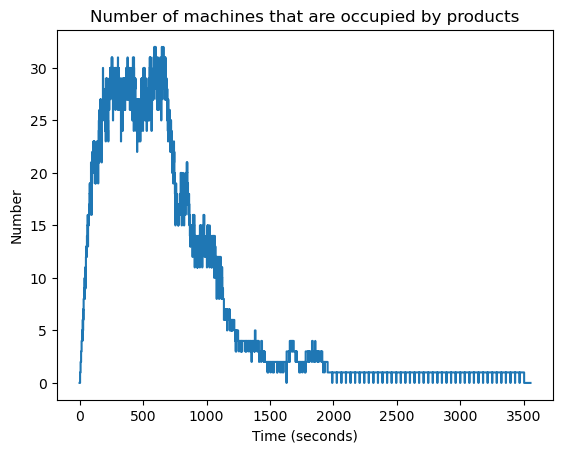

In [86]:
plt.figure()
plt.step(obs_time,obs_M_occupied)
plt.xlabel("Time (seconds)")
plt.ylabel("Number")
plt.title(u'Number of machines that are occupied by products')

In [87]:
occupied_per=[]
for i in range(len(obs_time)):
    occupied_per.append(obs_M_occupied[i]/N_machine*100)

Text(0.5, 1.0, 'Percentage of machine occupation')

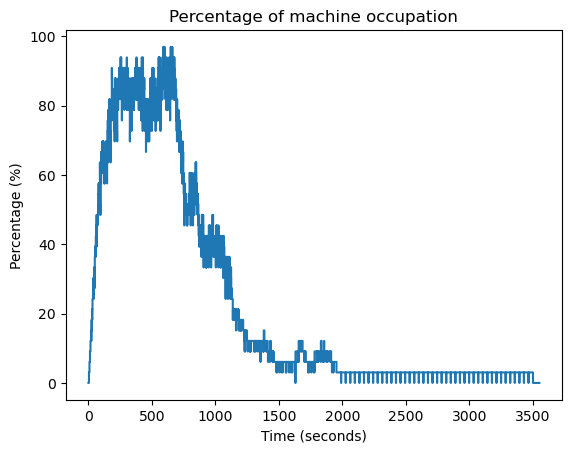

In [89]:
plt.figure()

plt.step(obs_time,occupied_per)
plt.xlabel("Time (seconds)")
plt.ylabel("Percentage (%)")
plt.title(u'Percentage of machine occupation')

In [90]:
total_M_occupied=0
normal_M_occupied=[]
for i in range(len(obs_time)):
    total_M_occupied=total_M_occupied+obs_M_occupied[i]
for i in range(len(obs_time)):
    normal_M_occupied.append(obs_M_occupied[i]/total_M_occupied)

In [91]:
T_less_10=0
T_less_5=0
for i in range(len(obs_time)):
    if (obs_M_occupied[i]<10):
        T_less_10=T_less_10+1
    if (obs_M_occupied[i]<5):
        T_less_5=T_less_5+1

In [92]:
max_N=0
for i in range(len(obs_time)):
    if (obs_M_occupied[i]>max_N):
        max_N=obs_M_occupied[i]

In [93]:
total_N=0
average_N=0
for i in range(end_time):
    total_N=total_N+obs_M_occupied[i]
average_N=total_N/end_time

In [94]:
print(f'the amount of time during which there are less than 10 machines occupied: {T_less_10}')
print(f'the amount of time during which there are less than 10 machines occupied: {T_less_5}')
print(f'end time= {end_time}')
print(f'max_N= {max_N}')
print(f'max_percent= {max_N/N_machine}')
print(f'average_N= {average_N}')
print(f'average_percent= {average_N/N_machine}')

the amount of time during which there are less than 10 machines occupied: 2473
the amount of time during which there are less than 10 machines occupied: 2327
end time= 3503
max_N= 32
max_percent= 0.9696969696969697
average_N= 8.086782757636312
average_percent= 0.24505402295867612


In [95]:
max_B=0
T_B=0
for i in range(len(obs_time)):
    if (obs_block3[i]>max_B):
        max_B=obs_block3[i]
        T_B=i

In [96]:
total_B=0
average_B=0
for i in range(end_time):
    total_B=total_B+obs_block3[i]
average_B=total_B/end_time

In [97]:
print(f'end time= {end_time}')
print(f'max_B= {max_B}')
print(f'max blocking rate= {max_B/S_p[0]}')

print(f'average_N= {average_B}')
print(f'average blocking rate= {average_B/S_p[0]}')
print(f'T_B= {T_B}')
print(f'At % of the process= {T_B/end_time}')

end time= 3503
max_B= 117
max blocking rate= 0.7048192771084337
average_N= 46.527833285755065
average blocking rate= 0.2802881523238257
T_B= 756
At % of the process= 0.21581501570082787


## Digital Twin machine learning-assisted simulation models

#### 1.Preprocessing -- import external libraries/ normalize data

In [98]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
from scipy.integrate import odeint  # for ODE time integration
import time

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [99]:
#normalize data
x=obs_M_occupied
normdata = (x-np.min(x))/(np.max(x)-np.min(x)) 
x1 = np.array(obs_time)

#### 2. Load data and Generate physical simulation models

Text(0.5, 1.0, 'Comparation Between Initial Data and Physical Model')

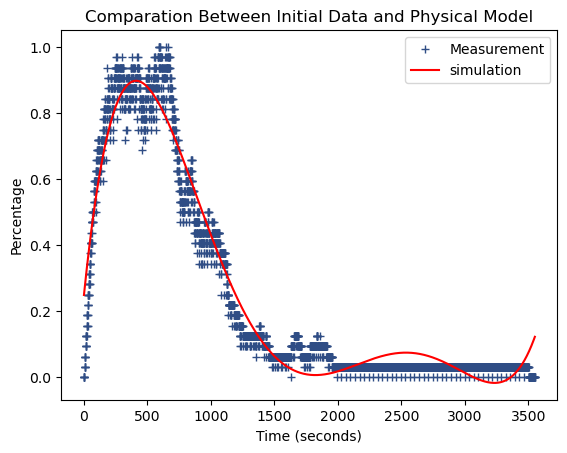

In [100]:
plt.figure()

plt.plot(obs_time,normdata,'+',color='#2F4D85')

an = np.polyfit(obs_time, normdata, 5) #fit with a cubic polynomial
yvals = np.polyval(an, obs_time)
plt.plot(x1, yvals, 'r', label='fitting curve')

plt.xlabel("Time (seconds)")
plt.ylabel("Percentage")
plt.legend(['Measurement','simulation'], loc="upper right")
plt.title(u'Comparation Between Initial Data and Physical Model')

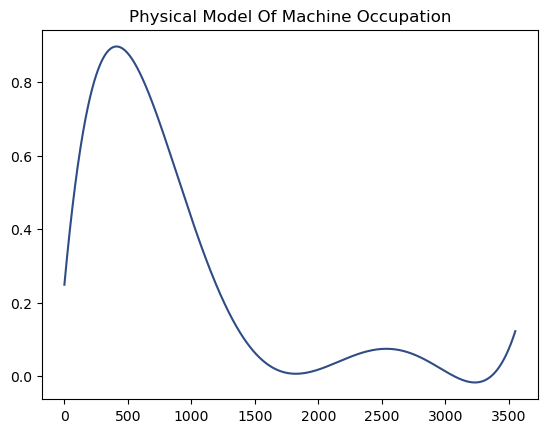

In [101]:
yvals = np.polyval(an, obs_time)
plt.title(u'Physical Model Of Machine Occupation')
plt.plot(x1, yvals, '#2F4D85', label='fitting curve')

Fitting Formula

In [102]:
print(an)

[ 1.22212992e-16 -1.22265225e-12  4.44790651e-09 -6.91596206e-06
  3.75053625e-03  2.48936540e-01]


In [103]:
p1 = np.poly1d(an)
print(p1)

           5             4             3             2
1.222e-16 x - 1.223e-12 x + 4.448e-09 x - 6.916e-06 x + 0.003751 x + 0.2489


#### 3.Compare experimental data with physical model

Compute the mean absolute error (MAE) between simulations and measurement

$\mathrm{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| x_{S,i} - x_{M, i} \right|$

In [104]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
# Mean Absolute Error
print("mean_absolute_error:", mean_absolute_error(normdata, yvals))

mean_absolute_error: 0.046473209327746214


#### 4. Design a hybrid digital twin to arrive at better predictions

following the presentation, we build a recurrent neural network model that can compensate for the simulation errors to come up with a better prediction given a set of initial values 

Each measurement consists of 𝑛timesteps=200 samples for the 𝑛dof=2 degrees of freedom (displacement 𝑥(𝑡) and the velocity 𝑥˙(𝑡)).

The measurement data will be stored in the tensor occupied_per, which has the dimensions [𝑛samples×𝑛timesteps×𝑛dof]. obs_time is the time vector

In [105]:
n_timesteps = len(obs_time)
n_timesteps

3553

In [106]:
from sklearn.model_selection import train_test_split
# a) define inputs and outputs
X_in = yvals          # input: the simulation time series
X_out = normdata - yvals    # output: difference between measurement and simulation

# b) split into train-test set (80-20)
X_in_train, X_in_test, X_out_train, X_out_test = train_test_split(X_in, X_out, test_size=0.2)

# c) check shapes
print('shape of X_in_train is: ' + str(X_in_train.shape) + '; shape of X_out_train is: ' + str(X_out_train.shape))
print('shape of X_in_test is: ' + str(X_in_test.shape) + '; shape of X_out_test is: ' + str(X_out_test.shape))

shape of X_in_train is: (2842,); shape of X_out_train is: (2842,)
shape of X_in_test is: (711,); shape of X_out_test is: (711,)


#### Build recurrent neural network

having a number of parameters to be optimized during training

In [107]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

In [108]:
#The Dense function in Keras constructs a fully connected neural network layer, automatically initializing the weights as biases.
#First hidden layer
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [109]:
X_in_train=np.expand_dims(X_in_train,axis=-1)
X_out_train=np.expand_dims(X_out_train,axis=-1)
print(X_in_train.shape)
print(X_out_train.shape)

(2842, 1)
(2842, 1)


now train the model on the training set. Observe also the performance on the test set to spot overfitting

In [110]:
epochs, batch_size = 150, 20
start = time.time()  # measure training time
history = model.fit(X_in_train, X_out_train, 
                    shuffle=True, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_in_test, X_out_test), 
                    verbose=1)
end = time.time()
print('--> training took ' + str(np.round(end-start, 2)) + ' seconds')

Epoch 1/150
143/143 [==============================] - 1s 4ms/step - loss: 0.0029 - mae: 0.0360 - val_loss: 0.0027 - val_mae: 0.0354
Epoch 2/150
143/143 [==============================] - 0s 2ms/step - loss: 0.0027 - mae: 0.0340 - val_loss: 0.0027 - val_mae: 0.0345
Epoch 3/150
143/143 [==============================] - 0s 2ms/step - loss: 0.0027 - mae: 0.0340 - val_loss: 0.0026 - val_mae: 0.0338
Epoch 4/150
143/143 [==============================] - 0s 2ms/step - loss: 0.0027 - mae: 0.0340 - val_loss: 0.0026 - val_mae: 0.0346
Epoch 5/150
143/143 [==============================] - 0s 2ms/step - loss: 0.0027 - mae: 0.0337 - val_loss: 0.0026 - val_mae: 0.0338
Epoch 6/150
143/143 [==============================] - 0s 2ms/step - loss: 0.0026 - mae: 0.0332 - val_loss: 0.0027 - val_mae: 0.0362
Epoch 7/150
143/143 [==============================] - 0s 2ms/step - loss: 0.0026 - mae: 0.0331 - val_loss: 0.0026 - val_mae: 0.0345
Epoch 8/150
143/143 [==============================] - 0s 2ms/step - 

Evaluate the training process and the final accuracy. Overfitting may occur, which can be observed through increasing training scores and decreasing test scores (diverging loss curves). 

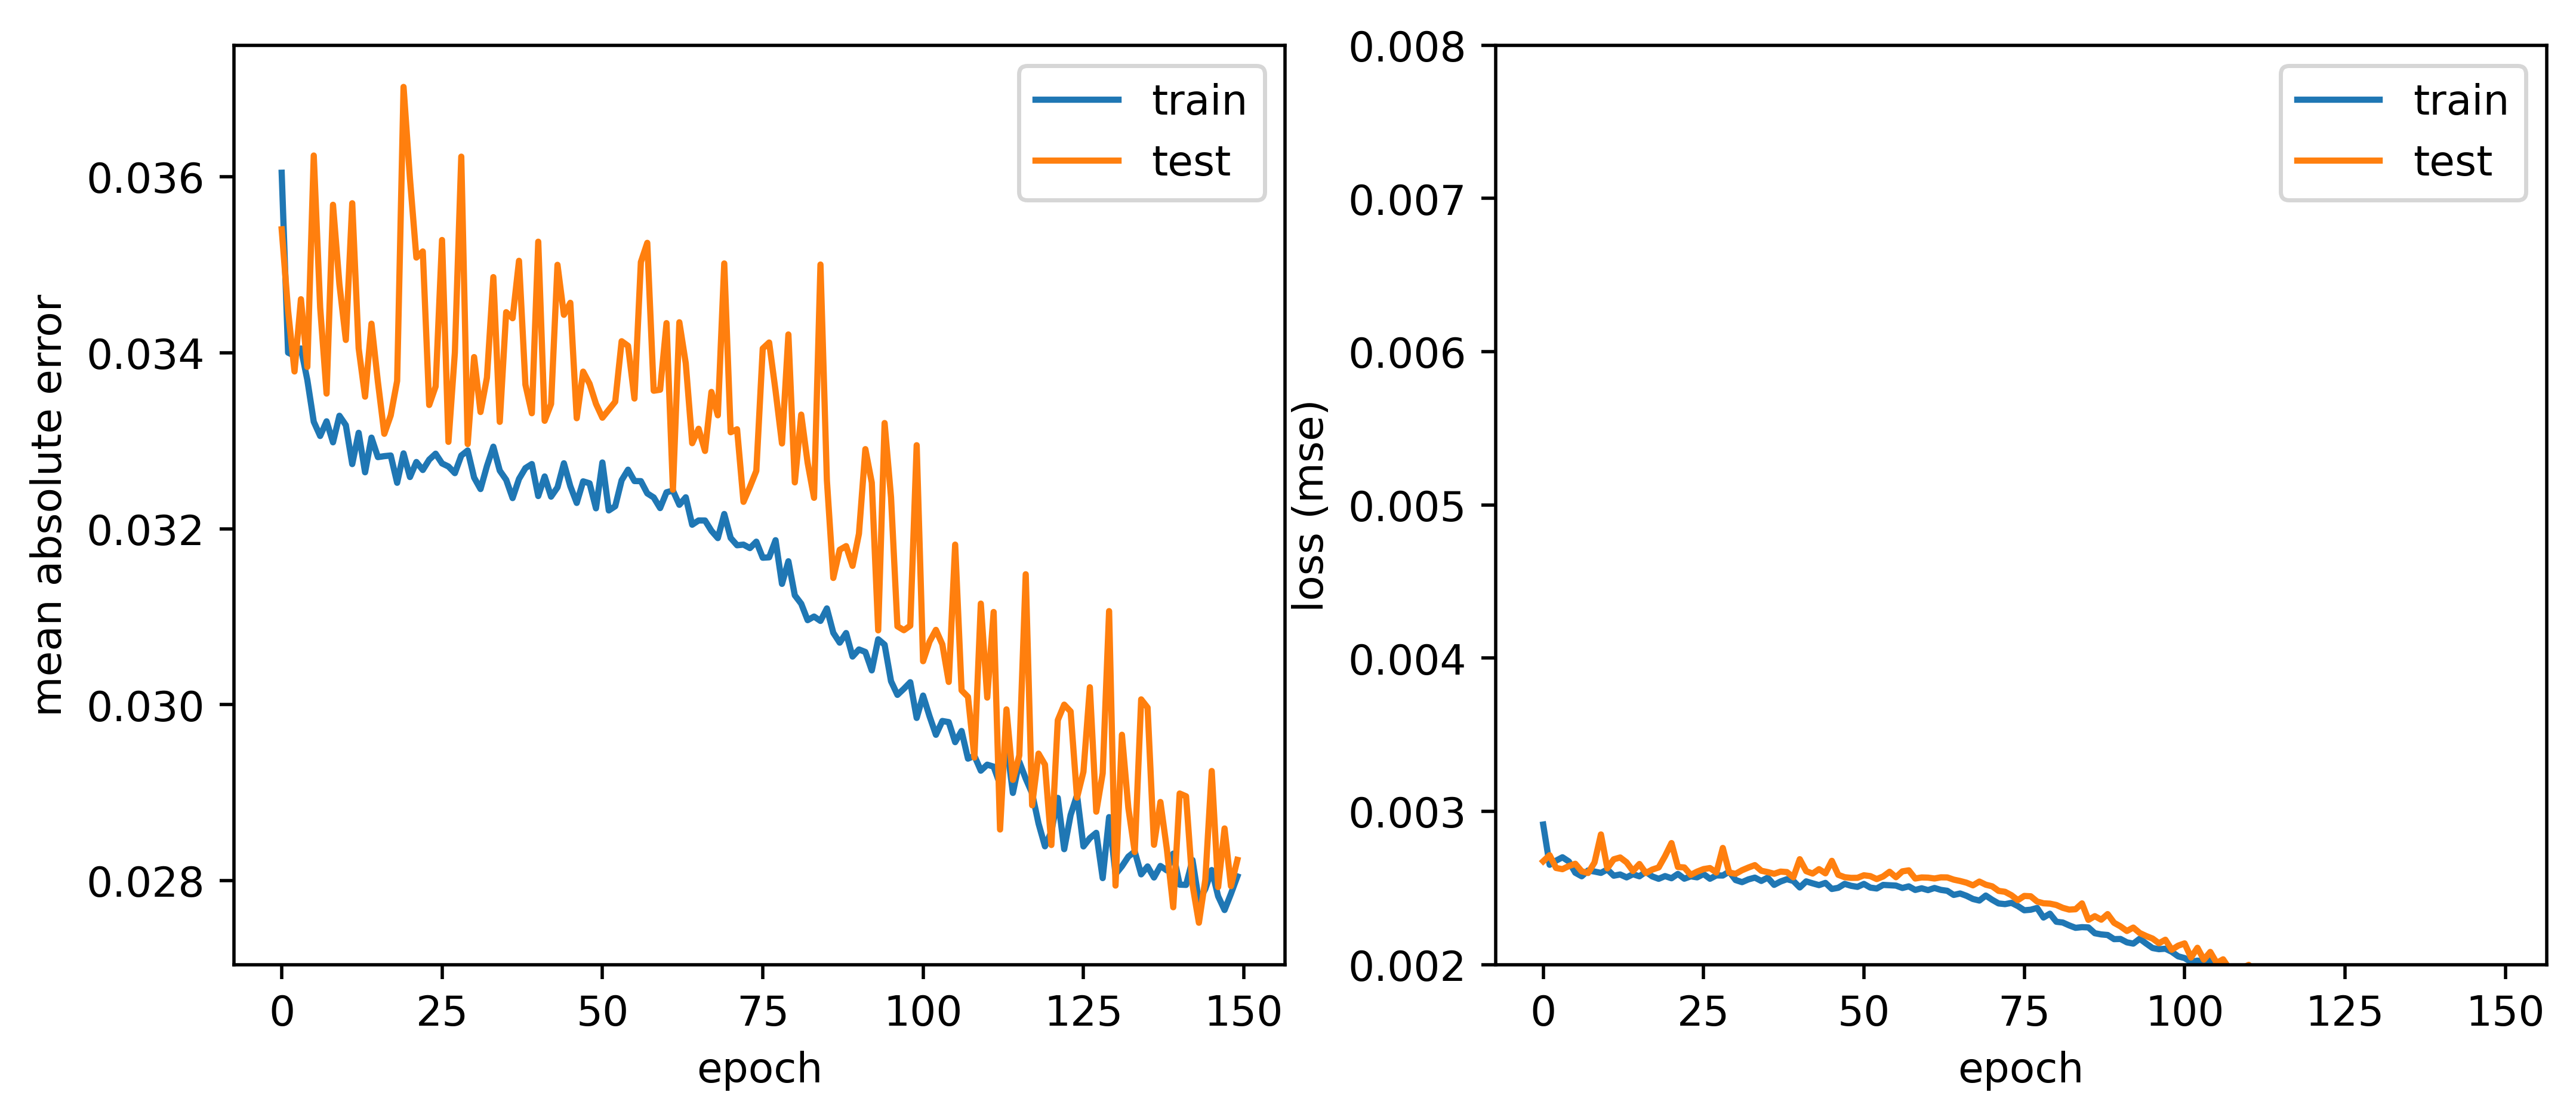

MAE of the neural network is 0.03


In [111]:
# evaluate the model to obtain a final test score
_, mae = model.evaluate(X_in_test, X_out_test, batch_size=batch_size, verbose=0)

plt.figure(figsize=(10, 4), dpi=500)
plt.subplot(1,2,1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['train', 'test'])
plt.xlabel('epoch')
plt.ylabel('mean absolute error')
#plt.ylim(0, 10)
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'])
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.ylim(0.002,0.008)
plt.show()

print('MAE of the neural network is ' + str(np.round(mae,2)))


#### 5. Compile the hybird digital twin 

Now we have all the ingredients ready for compiling the digital twin:
- **physics-based simulation model** (still not being optimal)
- **data-driven machine learning model** (compensating for the model errors)

The behavior prediction for a given initial condition $\mathbf{x}_{0}$ will be a three-step process:
1. run a time integration using the simulation model to obtain $\mathbf{x}_{S}$
2. provide $\mathbf{x}_{S}$ as input to the trained ML model to obtain the correction values $\mathbf{x}_{NN}$
3. obtain the final prediction by adding the previous results: $\mathbf{x}_{DT} = \mathbf{x}_{S} + \mathbf{x}_{NN}$

In [112]:
def digital_twin(x0, T):

    # 1. get simulation result
    xS = odeint(yvals, x0, T)

    # 2. feed simulation into the deep learning model to get correction factors
    xNN = model.predict(np.dstack(np.transpose(xS)))
    xNN = xNN[0, :, :]

    # 3. add simulation and RNN prediction
    xDT = xS + xNN

    return xDT, xS

#### 6. make a prediction

1. make a prediction for a data sample from the test set. The ML model has not seen these data before, so it's a good check if our model and the digital twin generalize well.
2. make a prediction for an initial value that lies outside the value range spanned by the training set. Let's see how we perform there

In [113]:
X_twin = X_in + model.predict(X_in).reshape(-1)

112/112 [==============================] - 0s 1ms/step


In [114]:
XM = normdata
XS = yvals

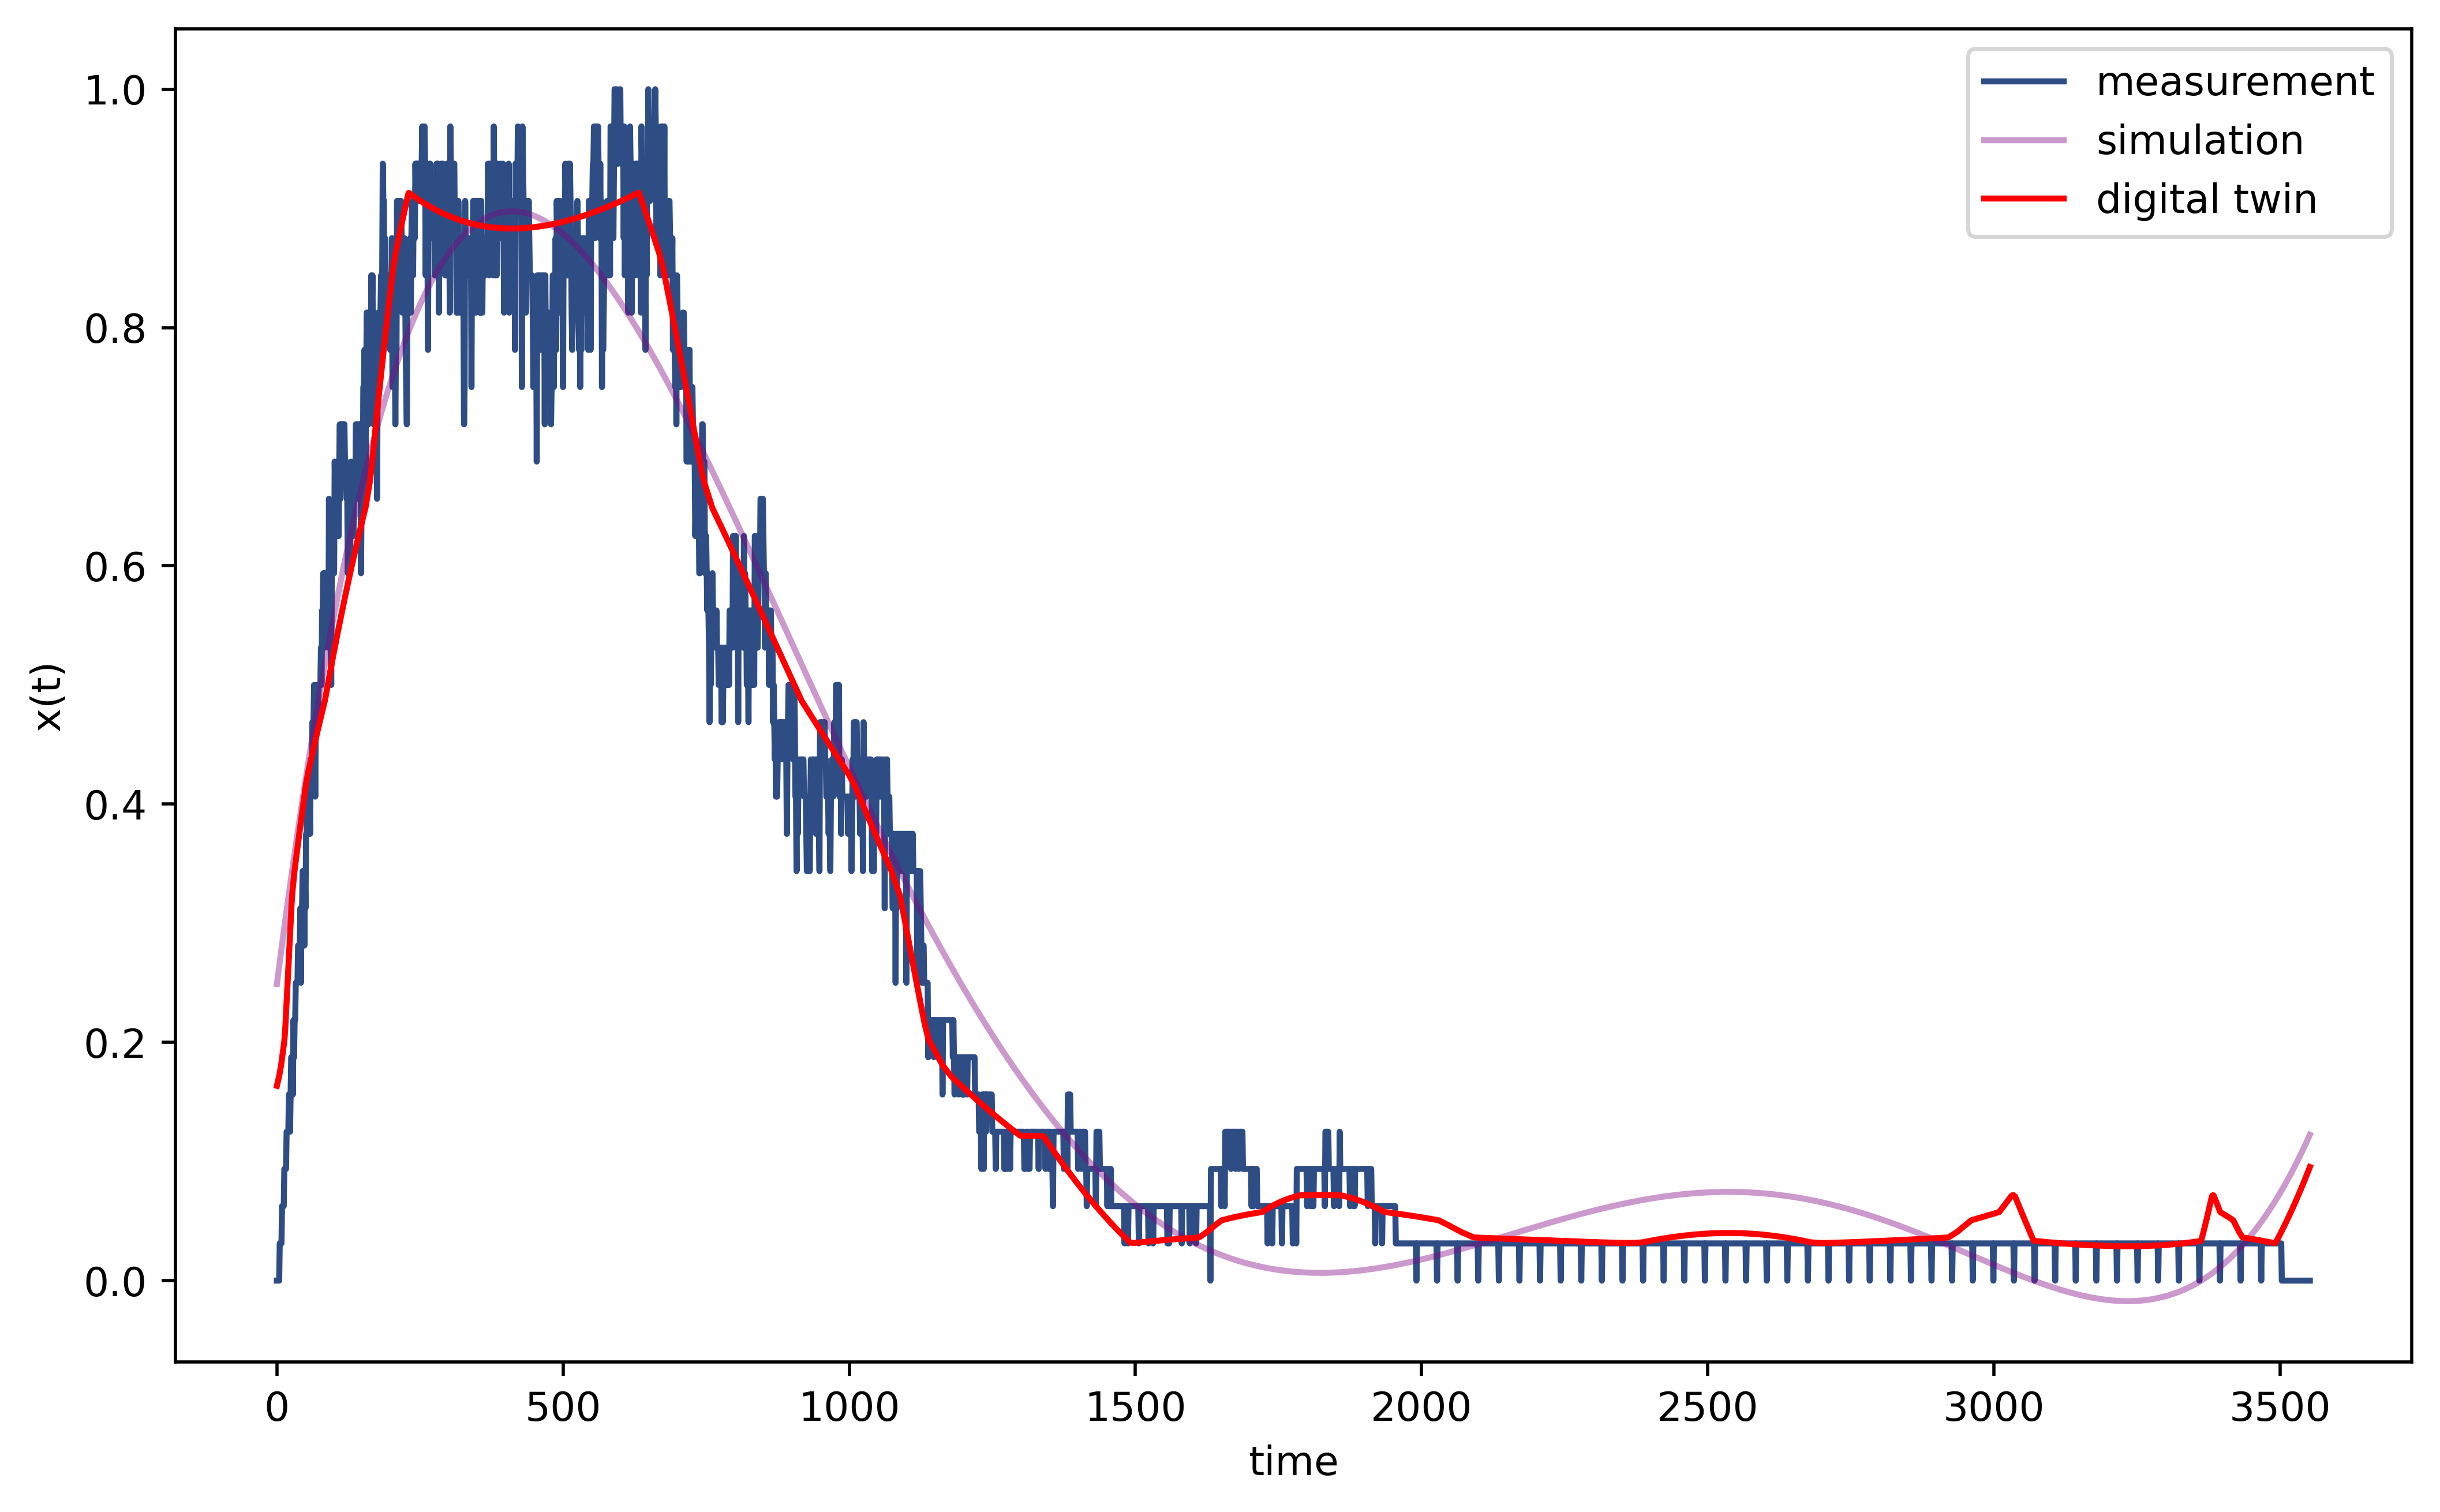

In [115]:
#yvals:simulation          
#normdata: measurement   

T=obs_time
#xM_sample = normdata  # 1. test data sample
#xDT_sample, xS_sample = digital_twin(xM_sample, T)

plt.figure(figsize=(10, 6), dpi=500)
plt.xlabel("time")
plt.ylabel("x(t)")
plt.plot(T, XM, color='#2F4D85')
plt.plot(T, XS, color='purple', alpha=0.4)
plt.plot(T, X_twin, color='red')
plt.legend(['measurement', 'simulation', 'digital twin'])

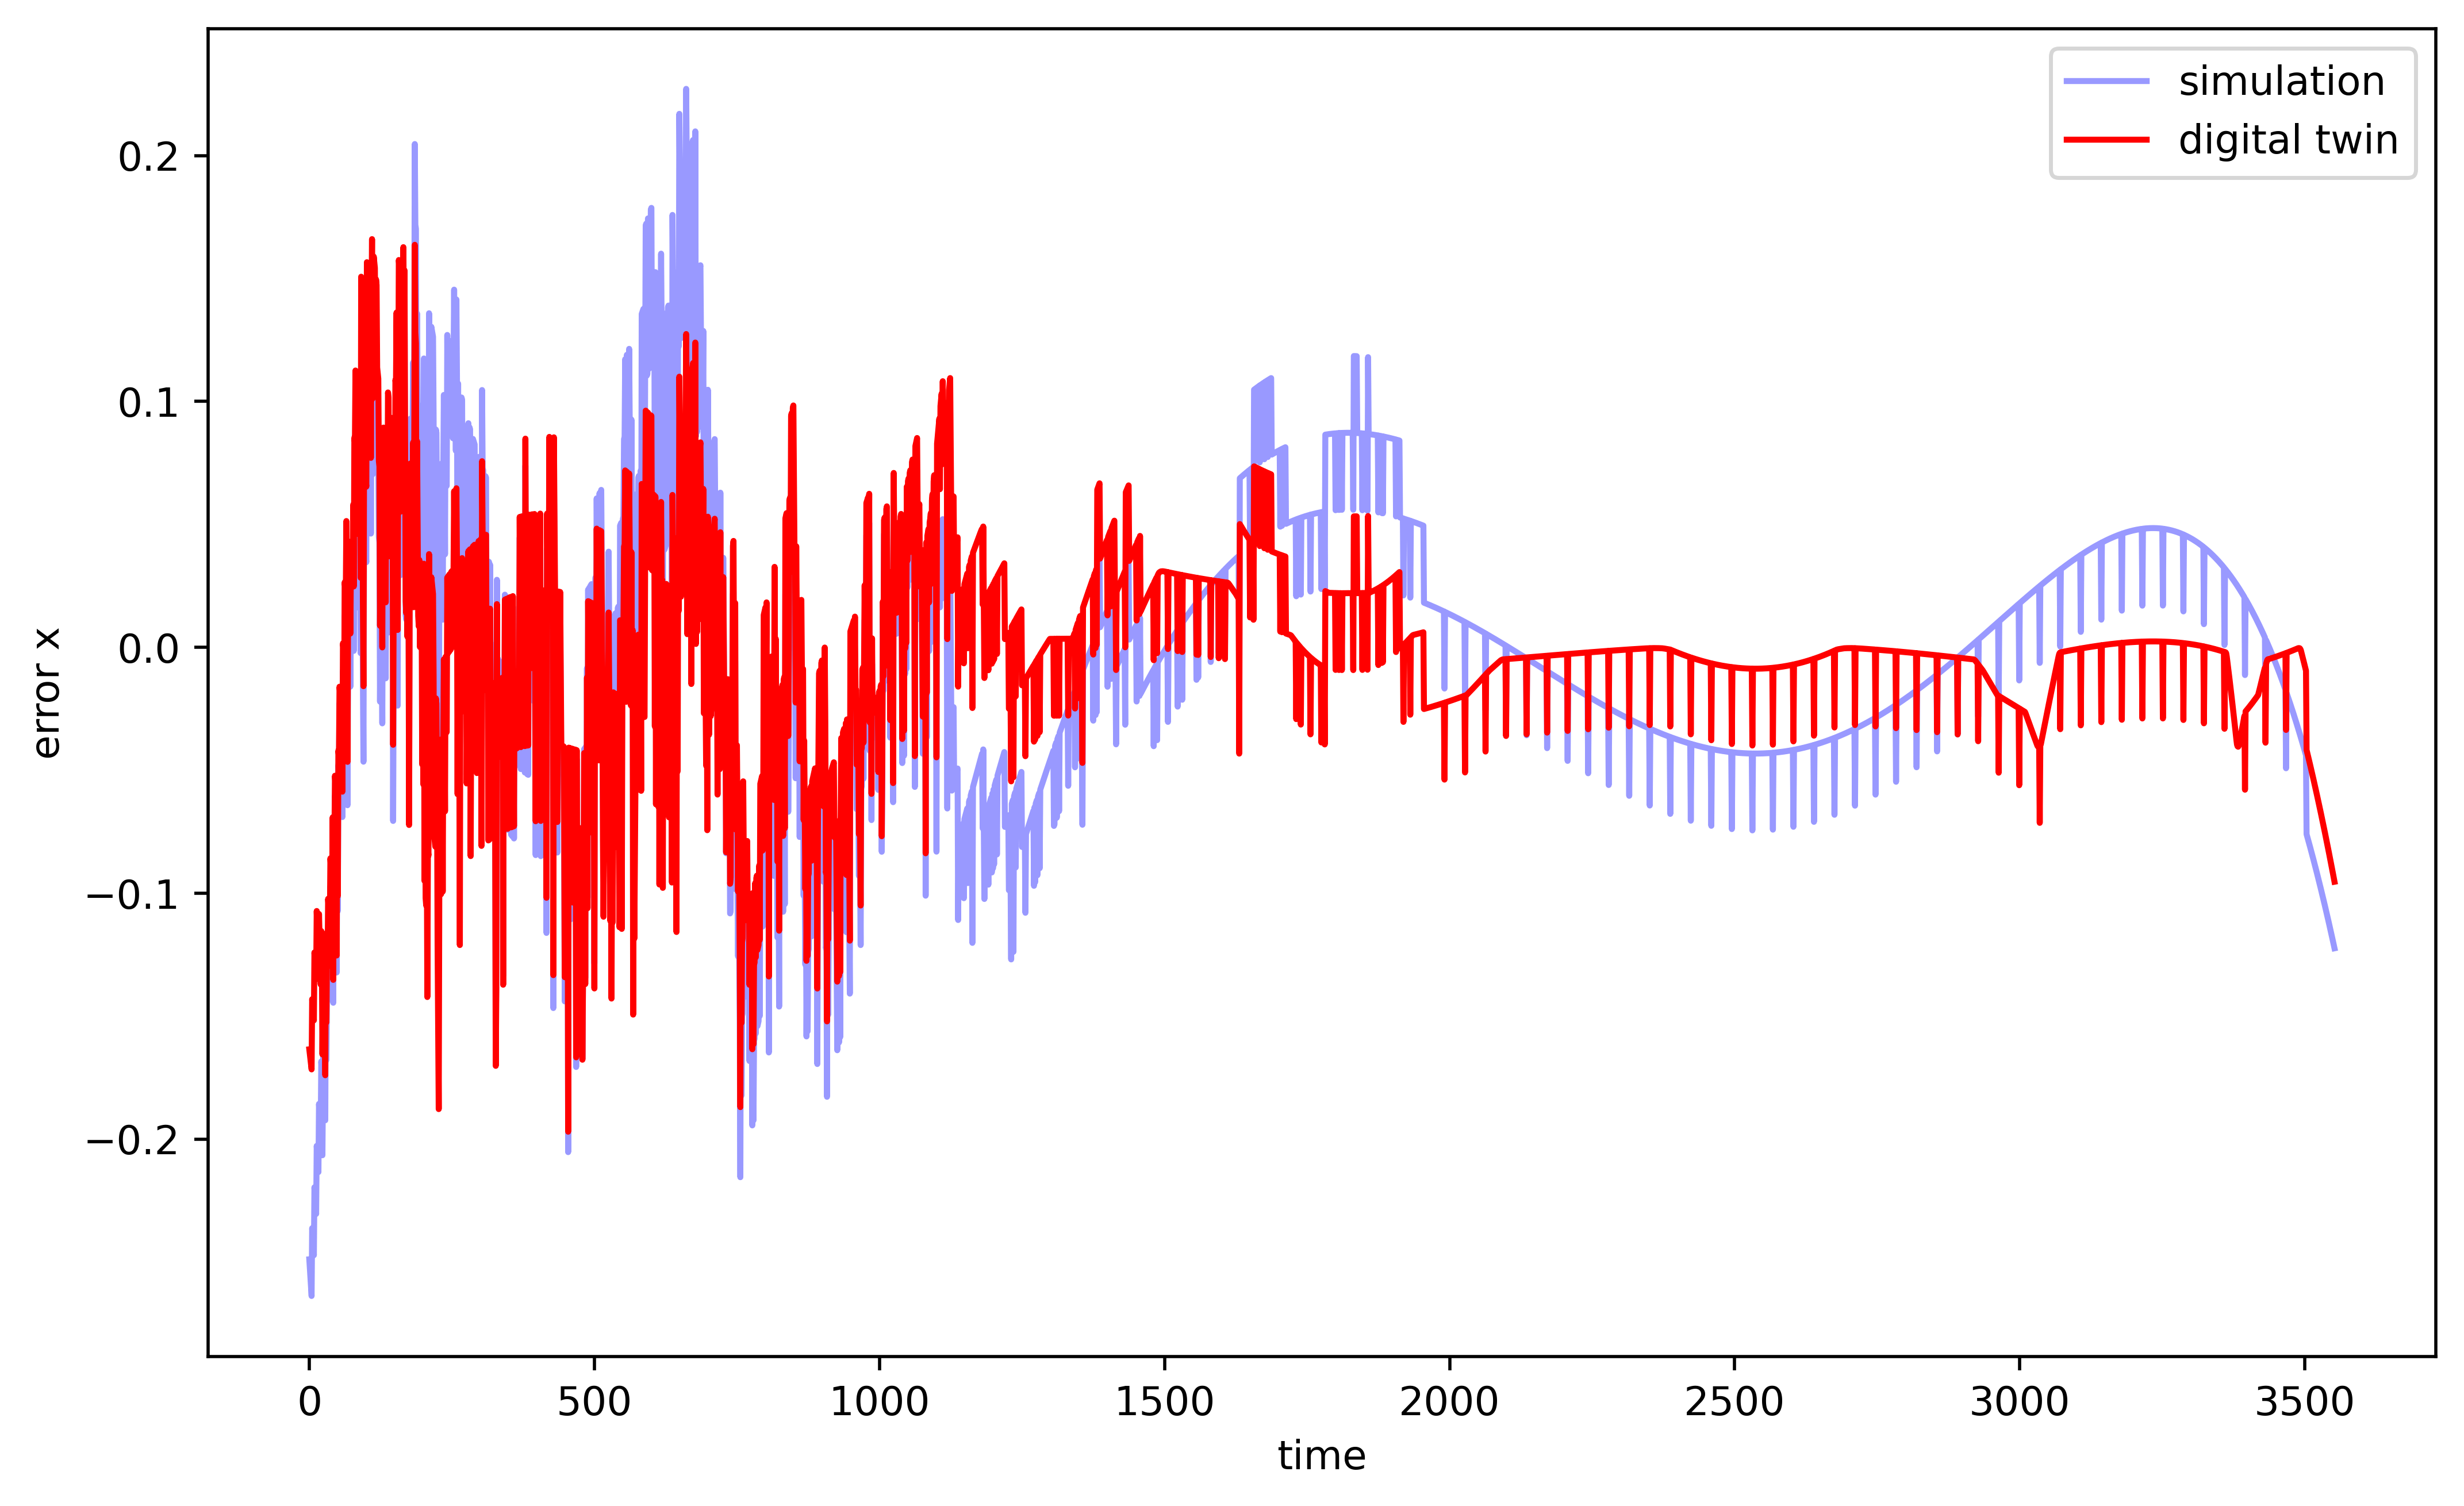

In [116]:
plt.figure(figsize=(10, 6), dpi=500)
plt.xlabel("time")
plt.ylabel("error x")
plt.plot(T, XM - XS, color='blue', alpha=0.4)
plt.plot(T, XM - X_twin, color='red')
plt.legend(['simulation', 'digital twin'])